In [2]:
import xgboost as xgb 
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_target = df['SUBCLASS']

disease_list = df.SUBCLASS.unique()

data = df.drop(columns=['ID', 'SUBCLASS'])
df_test.drop(columns=['ID'], inplace=True)
data

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,R895R,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [3]:
### ###
nCols = len(data.columns)
from collections import defaultdict
cDic = defaultdict()
for i, c in enumerate(data.columns):
    cDic[i] = c

In [4]:
def make_ndf (data, df_test):
    #data.drop('SUBCLASS', axis=1,inplace=True)
    #target = pd.concat([data,df_test])
    
    #2칸=>1칸
    ndf = pd.DataFrame()
    
    for i in range(nCols//2):
        ndf[cDic[i*2]] = total[total.columns[i*2]] +' '+ total[total.columns[(i*2+1)]]
    return ndf

In [2]:
diseaseList = df.SUBCLASS.value_counts().rename_axis('disease').reset_index(name='counts')
diseaseList

,disease,counts
0,BRCA,786
1,KIPAN,515
2,GBMLGG,461
3,STES,379
4,KIRC,334
5,THCA,324
6,SKCM,276
7,PRAD,266
8,OV,253
9,LGG,229


In [3]:
selected_genes = set()
for d in disease_list:
    df_ = data.copy()
    df_['SUBCLASS'] = df.loc[:, df.columns[1:2]]
    count_df = df_[df_.SUBCLASS==d].apply(lambda x : x!='WT').agg(sum)
    count_df = count_df[2:].reset_index(name='count')        
    num_transaction = diseaseList[diseaseList.disease == d]['counts'].values[0]
    th = 5 #20 if num_transaction > 250 else 5
    #th = num_transaction//divider
    #print( num_transaction, th)
    
    gene_list = count_df[count_df['count']>th]['index'].values
    print(d, len(gene_list))
    selected_genes.update(gene_list)
print(len(selected_genes))

    

KIPAN 287
SARC 32
SKCM 2112
KIRC 69
GBMLGG 148
STES 2033
BRCA 691
THCA 5
LIHC 107
HNSC 334
PAAD 23
OV 48
PRAD 17
UCEC 2006
LAML 10
COAD 936
ACC 52
LGG 17
LUSC 587
LUAD 468
CESC 176
PCPG 4
THYM 2
BLCA 209
TGCT 15
DLBC 18
2924


In [4]:
if 'SUBCLASS' in selected_genes:
    print('ry')

ry


In [5]:
selected_genes.remove("SUBCLASS")

In [6]:
total = pd.concat([data,df_test] ) #make_ndf(data, df_test)
f = lambda x : '' if x == 'WT' else x
total = total.map(f)
#data = total[:6201]
total

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,,,,,,,,,,,...,,,,,,,,,,
1,,,,,,,,,,,...,,,,,,,,,,
2,R895R,,,,,,,,,,...,,,,,,,,,,
3,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,,,,,,,,,,,...,,,,,,,,,,
2542,,,,,,,,,,,...,,,,,,,,,,
2543,,,,,,L217I,P221P P251P,R5M,G606D,I248Nfs,...,S2049Vfs S1909Vfs,L232R,,,L305L,,N252I N251I,G679V,,
2544,,,,,,,,,R1517H,,...,,,,,,,,,,


In [7]:

total = total.loc[:, list(selected_genes)]
total

,PTPRC,ABCB9,SLC28A2,DNAJC1,UQCRFS1,RPS3,CNTROB,CAP2,GPC4,IL2RB,...,ARPP21,PARD6G,PAXIP1,APBB2,SCP2,CDADC1,ACTC1,EPHA5,FETUB,CXCR4
0,,,,,,,,,,,...,,,,,,,,,,
1,,,,,,,,,,,...,,,,,,,,,,
2,,,,,,,,,,,...,,,,,,,E318K,,,
3,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,,,,,,,,,,,...,,,,,,,,,,
2542,,,,,S106T,,,,,,...,,,,,,,,,,
2543,S1109S S948S,,M510I,K193Rfs,V146V,,G922Efs G714Efs G901Efs G900Efs G812Efs,A197T A171T,,S514S,...,T536T T663T T399T T581T T630T T623T T684T T649...,,R631R,,,,,V426F V357F,R75Q,
2544,,,,,,,,,,,...,,,,,,,,,,


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for c in total.columns:
    total[c] = encoder.fit_transform(total[c])



In [9]:
df = total[:6201]
df_test = total[6201:]



In [10]:
df

,PTPRC,ABCB9,SLC28A2,DNAJC1,UQCRFS1,RPS3,CNTROB,CAP2,GPC4,IL2RB,...,ARPP21,PARD6G,PAXIP1,APBB2,SCP2,CDADC1,ACTC1,EPHA5,FETUB,CXCR4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,20,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,161,0,0,0,0,0,0,0,0,0,...,0,0,0,47,0,0,42,182,0,0
6197,235,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_test

,PTPRC,ABCB9,SLC28A2,DNAJC1,UQCRFS1,RPS3,CNTROB,CAP2,GPC4,IL2RB,...,ARPP21,PARD6G,PAXIP1,APBB2,SCP2,CDADC1,ACTC1,EPHA5,FETUB,CXCR4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,41,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,44,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2542,0,0,0,0,26,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2543,179,0,48,23,35,0,29,7,0,80,...,190,0,84,0,0,0,0,264,62,0
2544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.preprocessing import LabelEncoder
X = df
y = df_target
encoder2 = LabelEncoder()
y = encoder2.fit_transform(y)
y


array([ 8, 19, 20, ...,  4, 22, 20])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=156)#shuffle=False,stratify = y, 
print(X_train.shape, X_test.shape)

(4340, 2923) (1861, 2923)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
# 기본설정 랜덤포레스트
rf = RandomForestClassifier(n_jobs=-1) # 모든 코어 사용

# 피쳐중요도만 확인할 것이기 때문에 fit만 한다.
rf.fit(X_train, y_train)



[2.04642970e-04 3.98592540e-04 2.79968136e-04 ... 3.50357354e-04
 7.54695079e-04 1.11667993e-05] 

BRAF      0.024510
IDH1      0.023938
VHL       0.018869
TP53      0.017451
PIK3CA    0.015645
APC       0.012221
PTEN      0.007453
ATRX      0.007118
NPM1      0.006901
GATA3     0.004682
CDH1      0.004532
CTNNB1    0.004399
RYR2      0.004140
PCLO      0.003976
EGFR      0.003961
dtype: float64


In [29]:
X


,IL1RL2,SREBF2,ZNRF4,LRRC15,CHRNA5,IL1RL1,CDC5L,OAZ3,NIPBL,COL9A1,...,ACE,ARFGEF2,CEP192,ALDOB,LEF1,CCR7,CDH6,PRKCA,MSR1,RPL39
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,53,0,0,0,28,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,0,0,0,0,0,104,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6198,0,0,0,0,0,0,0,0,0,158,...,0,0,0,0,0,0,0,0,0,0
6199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=len(total.columns),                            n_informative=2, n_redundant=0,                           random_state=0, shuffle=False)
#clf = RandomForestClassifier(max_depth=2, random_state=0, n_jobs=-1)
clf = RandomForestClassifier(
    n_estimators=500,             # 트리의 개수 (너무 적으면 모델이 불안정하고, 너무 많으면 학습 시간이 오래 걸림)
    max_features='sqrt',          # 각 트리에서 선택할 피처의 수 (sqrt는 약 63개 피처를 사용, 피처가 많을 때 좋은 기본값)
    max_depth=None,               # 트리의 최대 깊이 (None이면 트리가 완전히 성장할 때까지 분할)
    min_samples_split=2,          # 노드를 분할하기 위한 최소 샘플 수 (default값)
    min_samples_leaf=1,           # 리프 노드에 있어야 하는 최소 샘플 수 (default값)
    bootstrap=True,               # 부트스트랩 샘플링을 사용할지 여부 (default는 True, 부트스트랩을 사용하면 트리 간의 다양성을 증가)
    n_jobs=-1,                    # 가능한 모든 CPU 코어를 사용하여 학습 (병렬 처리)
    random_state=42,              # 재현성을 위해 랜덤 시드 설정
    class_weight='balanced',      # 데이터 불균형일 경우 자동으로 가중치 조정
    verbose=1                     # 학습 과정에서 출력 메시지 (진행 상황을 확인할 수 있음)
    )
    
clf.fit(X, y) 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.3s finished


RandomForestClassifier(class_weight='balanced', n_estimators=500, n_jobs=-1,
                       random_state=42, verbose=1)

In [21]:
# 그냥 확인하기에 피쳐종류가 30개나 되어 한눈에 들어오지 않는다.
print(clf.feature_importances_, '\n')

# 시리즈로 만들어 인덱스를 붙인다
ser = pd.Series(clf.feature_importances_, index=X_train.columns)  

# 내림차순 정렬을 이용한다
top15 = ser.sort_values(ascending=False)[:15]
print(top15)


[0.00114819 0.00025358 0.0002392  ... 0.00024652 0.0004358  0.00016144] 

IDH1      0.020708
BRAF      0.019277
TP53      0.017054
VHL       0.013227
APC       0.013010
NPM1      0.008210
PIK3CA    0.007667
PTEN      0.007452
CTNNB1    0.005281
ATRX      0.005206
RYR2      0.004264
SYNE1     0.003679
PCLO      0.003486
HRAS      0.003479
CDKN2A    0.003409
dtype: float64


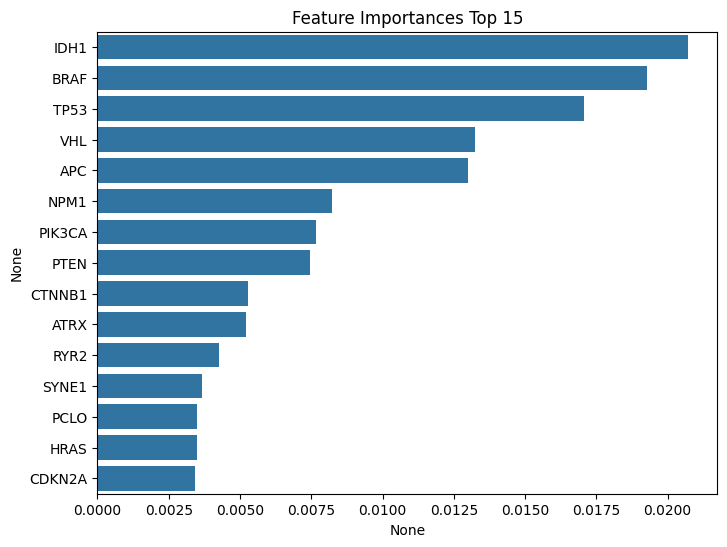

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 15')
sns.barplot(x=top15, y=top15.index)
plt.show()

#Multi-class classification

In [14]:
dtrain = xgb.DMatrix(data = X_train, label= y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [15]:
params = {
    'tree_method': 'approx',
    'objective': 'multi:softprob',
    'num_class': 26
}
num_boost_round = 50

dtrain = xgb.DMatrix(data = X_train, label= y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)
model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_boost_round , early_stopping_rounds=5, 
                  evals=[(dtrain, 'train'), (dtest, 'valid')],
                  verbose_eval=2)

[0]	train-mlogloss:2.60282	valid-mlogloss:2.69913
[2]	train-mlogloss:2.20740	valid-mlogloss:2.44187
[4]	train-mlogloss:1.97737	valid-mlogloss:2.32362
[6]	train-mlogloss:1.81494	valid-mlogloss:2.24921
[8]	train-mlogloss:1.69535	valid-mlogloss:2.21048
[10]	train-mlogloss:1.59803	valid-mlogloss:2.17941
[12]	train-mlogloss:1.52313	valid-mlogloss:2.15996
[14]	train-mlogloss:1.45965	valid-mlogloss:2.14780
[16]	train-mlogloss:1.40160	valid-mlogloss:2.13869
[18]	train-mlogloss:1.35354	valid-mlogloss:2.13332
[20]	train-mlogloss:1.31151	valid-mlogloss:2.12929
[22]	train-mlogloss:1.27535	valid-mlogloss:2.12630
[24]	train-mlogloss:1.24118	valid-mlogloss:2.12508
[26]	train-mlogloss:1.21099	valid-mlogloss:2.12380
[28]	train-mlogloss:1.18210	valid-mlogloss:2.12580
[30]	train-mlogloss:1.15517	valid-mlogloss:2.12705
[31]	train-mlogloss:1.14258	valid-mlogloss:2.12779


In [ ]:
n_estimators = 100,        # 부스팅 단계 수
                        max_depth = 8,             # 개별 트리의 최대 깊이
                        learning_rate = 0.1,       # 학습률, 낮출수록 느리게 학습하지만 성능 개선 가능
                        subsample=0.8,           # 각 부스팅 단계에서 사용할 샘플의 비율
                        #scale_pos_weight = class_weight_dict,  # 클래스별 가중치
                        colsample_bytree=0.8,    # 각 트리에서 사용할 특성의 비율
                        random_state = 42,         # 랜덤 시드
                        n_jobs = -1,             # 모든 CPU 코어 사용,
                        early_stopping_rounds = 5,
                        **params

In [18]:
params = {
    'tree_method': 'approx',
    'objective': 'multi:softprob',
    'learning_rate': 0.05
}
num_boost_round = 200

clf = xgb.XGBClassifier(
    n_estimators=500, # 부스팅 단계 수
    #learning_rate=0.1,
    max_depth=6,  # 개별 트리의 최대 깊이
    min_child_weight=1,
    subsample=0.8,# 각 부스팅 단계에서 사용할 샘플의 비율
    colsample_bytree=0.8,# 각 트리에서 사용할 특성의 비율
    gamma=0,
    scale_pos_weight=1,  # 필요에 따라 조정
    #objective='multi:softmax',
    num_class=26,
    eval_metric='mlogloss',
    random_state=42,
    early_stopping_rounds=5, 
    **params) 
clf.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test,y_test)],
        verbose=2);

[0]	validation_0-mlogloss:3.15876	validation_1-mlogloss:3.17608
[2]	validation_0-mlogloss:2.99158	validation_1-mlogloss:3.02922
[4]	validation_0-mlogloss:2.86998	validation_1-mlogloss:2.93082
[6]	validation_0-mlogloss:2.76515	validation_1-mlogloss:2.85203
[8]	validation_0-mlogloss:2.67030	validation_1-mlogloss:2.77973
[10]	validation_0-mlogloss:2.59047	validation_1-mlogloss:2.72055
[12]	validation_0-mlogloss:2.51627	validation_1-mlogloss:2.66481
[14]	validation_0-mlogloss:2.44921	validation_1-mlogloss:2.61841
[16]	validation_0-mlogloss:2.39003	validation_1-mlogloss:2.57839
[18]	validation_0-mlogloss:2.33443	validation_1-mlogloss:2.53992
[20]	validation_0-mlogloss:2.28507	validation_1-mlogloss:2.50696
[22]	validation_0-mlogloss:2.23806	validation_1-mlogloss:2.47735
[24]	validation_0-mlogloss:2.19310	validation_1-mlogloss:2.44939
[26]	validation_0-mlogloss:2.15361	validation_1-mlogloss:2.42600
[28]	validation_0-mlogloss:2.11512	validation_1-mlogloss:2.40303
[30]	validation_0-mlogloss:2.0

In [19]:
y_true = y_test
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
y_true.shape, y_pred.shape, y_score.shape

((1861,), (1861,), (1861, 26))

In [52]:
from sklearn import metrics 
metrics.accuracy_score(y_true, y_pred)

0.34712520150456744

In [20]:
from sklearn import metrics 
metrics.accuracy_score(y_true, y_pred)

0.34551316496507256

In [36]:
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        35
           2       0.13      0.99      0.23       238
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00        63
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00       150
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00       159
           9       0.00      0.00      0.00       104
          10       0.00      0.00      0.00        48
          11       0.00      0.00      0.00        57
          12       0.00      0.00      0.00        48
          13       0.00      0.00      0.00        59
          14       0.00      0.00      0.00        49
          15       0.00      0.00      0.00        93
          16       0.00      0.00      0.00        28
          17       0.00    

In [34]:
metrics.roc_auc_score(y_true, y_score, average='weighted', multi_class='ovr')

0.8540263969410469

In [38]:
metrics.roc_auc_score(y_true, y_score, average='weighted', multi_class='ovr')

0.8388535651804083

## Create Result DataFrame

In [21]:
clf.predict(df_test)

array([21, 25,  2, ..., 25, 10,  6])

In [22]:
res = clf.predict(df_test)
res = encoder2.inverse_transform(res)
df_test1 = pd.read_csv('test.csv')
res_df = pd.DataFrame ({'ID' : df_test1['ID'], 'SUBCLASS' : res})
res_df


In [ ]:
res_df.SUBCLASS.value_counts()

## 01 Update Result with Zeros []

In [63]:
zerosl = list(df_test[(df_test == 0).all(axis=1)].index)
res_df.loc[zerosl, 'SUBCLASS'] = 'THYM'

In [64]:
res_df

,ID,SUBCLASS
0,TEST_0000,STES
1,TEST_0001,UCEC
2,TEST_0002,BRCA
3,TEST_0003,LGG
4,TEST_0004,HNSC
...,...,...
2541,TEST_2541,STES
2542,TEST_2542,HNSC
2543,TEST_2543,UCEC
2544,TEST_2544,LAML


In [ ]:
res_df.SUBCLASS.value_counts()

In [66]:
res_df.loc[180]

ID          TEST_0180
SUBCLASS         THYM
Name: 180, dtype: object

## SAVE res_df with zero step

In [67]:
res_df.to_csv('res-step-1.csv',index = False)

In [8]:
############## <5 Finding SubSet

In [7]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

data = df.drop(columns=['ID', 'SUBCLASS'])
df_test.drop(columns='ID',inplace=True)

total = pd.concat([data, df_test])
f = lambda x : 0 if x == 'WT' else 1
total = total.map(f)

data = total[:6201]
df_test = total[6201:]


In [9]:
data

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#하나라도 1인  

# 딱 1개만 1인 행 필터링
one_1_rows = df_test[df_test.sum(axis=1) == 1]

# 각 행에서 1이 위치한 열의 이름과 인덱스를 구하는 코드
result = [(index, row.idxmax()) for index, row in one_1_rows.iterrows()]
result

[(8, 'SOX9'),
 (90, 'BRAF'),
 (110, 'LIG1'),
 (131, 'IDH2'),
 (170, 'PLK4'),
 (192, 'ZNF365'),
 (260, 'BRAF'),
 (352, 'PRKDC'),
 (366, 'VHL'),
 (390, 'DOCK2'),
 (435, 'CDCP1'),
 (619, 'GFPT2'),
 (655, 'CTNNA1'),
 (672, 'CD46'),
 (693, 'HRAS'),
 (701, 'HRAS'),
 (798, 'CCNL1'),
 (880, 'GNAO1'),
 (898, 'ATXN1'),
 (1023, 'MYH1'),
 (1034, 'CDKN2A'),
 (1071, 'VHL'),
 (1078, 'CACNA1A'),
 (1118, 'ACE'),
 (1202, 'VHL'),
 (1263, 'BRAF'),
 (1287, 'TG'),
 (1408, 'VHL'),
 (1426, 'VHL'),
 (1437, 'SREBF2'),
 (1560, 'CACNA1A'),
 (1690, 'LRPPRC'),
 (1761, 'VHL'),
 (1804, 'RAD21'),
 (1830, 'LIG1'),
 (1833, 'VHL'),
 (1851, 'NPM1'),
 (1879, 'VHL'),
 (1884, 'KMT2D'),
 (1979, 'NPM1'),
 (2056, 'VHL'),
 (2086, 'VHL'),
 (2114, 'BRCA2'),
 (2150, 'NPM1'),
 (2218, 'TP53'),
 (2383, 'NPM1'),
 (2447, 'CDH1'),
 (2512, 'SUCLG1')]

In [116]:
one_VHL_l=[]
one_BRAF_l = []
one_NPM1_l = []
one_LIG1_l = []
one_s = []
res_df1 = res_df.copy()

for i, c in result:
    print(i, c)
    if c =='VHL': 
        one_VHL_l.append(i)
        # 해당 컬럼에서 SUBCLASS값들의 분포를 구함
        q = ['VHL']
        rows_with_all_ones = df[data[q].eq(1).all(axis=1)] 
        rs = rows_with_all_ones['SUBCLASS'].value_counts().reset_index(name='count').loc[1].SUBCLASS #KIRC
        res_df1.loc[one_VHL_l,'SUBCLASS'] = rs
    elif c=='BRAF': 
        one_BRAF_l.append(i)
        q = ['BRAF']
        rows_with_all_ones = df[data[q].eq(1).all(axis=1)]
        rs = rows_with_all_ones['SUBCLASS'].value_counts().reset_index(name='count').loc[1].SUBCLASS #maybe 1
        res_df1.loc[one_BRAF_l,'SUBCLASS'] = rs
    #elif c=='NPM1' : 
        one_NPM1_l.append(i)
        q = ['NPM1']
        rows_with_all_ones = df[data[q].eq(1).all(axis=1)]
        rs = rows_with_all_ones['SUBCLASS'].value_counts().reset_index(name='count').loc[0].SUBCLASS#0 not 1
        res_df1.loc[one_NPM1_l,'SUBCLASS'] = rs
    elif c=='LIG1' : 
        one_LIG1_l.append(i)
        q = ['LIG1']
        rows_with_all_ones = df[data[q].eq(1).all(axis=1)]
        rs = rows_with_all_ones['SUBCLASS'].value_counts().reset_index(name='count').loc[0].SUBCLASS#0 not 1
        res_df1.loc[one_LIG1_l,'SUBCLASS'] = rs
    elif c=='HRAS': 
        one_s.append(i)
        q = ['HRAS']
        rows_with_all_ones = df[data[q].eq(1).all(axis=1)]
        rs = rows_with_all_ones['SUBCLASS'].value_counts().reset_index(name='count').loc[1].SUBCLASS#0 not 1
        res_df1.loc[one_s,'SUBCLASS'] = rs
    # else:
        ###one_s.append(i)
        #row_no = i
    #    q = [c]
    #    rows_with_all_ones = df[data[q].eq(1).all(axis=1)]
    #    rs = rows_with_all_ones['SUBCLASS'].value_counts().reset_index(name='count').loc[0].SUBCLASS
    #    res_df1.loc[i]['SUBCLASS'] = rs
    

res_df1.to_csv('res-step2-ones.csv',index = False)
    

8 SOX9
90 BRAF
110 LIG1
131 IDH2
170 PLK4
192 ZNF365
260 BRAF
352 PRKDC
366 VHL
390 DOCK2
435 CDCP1
619 GFPT2
655 CTNNA1
672 CD46
693 HRAS
701 HRAS
798 CCNL1
880 GNAO1
898 ATXN1
1023 MYH1
1034 CDKN2A
1071 VHL
1078 CACNA1A
1118 ACE
1202 VHL
1263 BRAF
1287 TG
1408 VHL
1426 VHL
1437 SREBF2
1560 CACNA1A
1690 LRPPRC
1761 VHL
1804 RAD21
1830 LIG1
1833 VHL
1851 NPM1
1879 VHL
1884 KMT2D
1979 NPM1
2056 VHL
2086 VHL
2114 BRCA2
2150 NPM1
2218 TP53
2383 NPM1
2447 CDH1
2512 SUCLG1


In [ ]:
############# optional code

In [15]:
## TEST 데이터에서 1개의 컬럼만 1인 경우 찾기
one_1_rows = df_test[df_test.sum(axis=1) == 1]
# 각 열(column)별로 1이 있는 인덱스 리스트 생성
result_dict = {}
for column in one_1_rows.columns:
    indices = one_1_rows[one_1_rows[column] == 1].index.tolist()
    if indices:  # 인덱스가 비어있지 않으면 추가
        result_dict[column] = indices

# 딕셔너리를 DataFrame으로 변환
result_df = pd.DataFrame(list(result_dict.items()), columns=['gene', 'index_list'])
result_df


,gene,index_list
0,ACE,[1118]
1,ATXN1,[898]
2,BRAF,"[90, 260, 1263]"
3,BRCA2,[2114]
4,CACNA1A,"[1078, 1560]"
5,CCNL1,[798]
6,CD46,[672]
7,CDCP1,[435]
8,CDH1,[2447]
9,CDKN2A,[1034]


In [17]:
for q in result_df.gene:
    print(q)
    rows_with_all_ones = df[(data[q] == 1) & (data.drop(columns=q) == 0).all(axis=1)]
    rs = rows_with_all_ones['SUBCLASS'].value_counts().reset_index(name='count') #.loc[1].SUBCLASS #KIRC
    #res_df1.loc[one_VHL_l,'SUBCLASS'] = rs
    print(rs)

ACE
Empty DataFrame
Columns: [SUBCLASS, count]
Index: []
ATXN1
Empty DataFrame
Columns: [SUBCLASS, count]
Index: []
BRAF
  SUBCLASS  count
0     THCA     17
1      LGG      1
BRCA2
Empty DataFrame
Columns: [SUBCLASS, count]
Index: []
CACNA1A
Empty DataFrame
Columns: [SUBCLASS, count]
Index: []
CCNL1
Empty DataFrame
Columns: [SUBCLASS, count]
Index: []
CD46
Empty DataFrame
Columns: [SUBCLASS, count]
Index: []
CDCP1
Empty DataFrame
Columns: [SUBCLASS, count]
Index: []
CDH1
Empty DataFrame
Columns: [SUBCLASS, count]
Index: []
CDKN2A
  SUBCLASS  count
0    KIPAN      1
CTNNA1
Empty DataFrame
Columns: [SUBCLASS, count]
Index: []
DOCK2
Empty DataFrame
Columns: [SUBCLASS, count]
Index: []
GFPT2
Empty DataFrame
Columns: [SUBCLASS, count]
Index: []
GNAO1
Empty DataFrame
Columns: [SUBCLASS, count]
Index: []
HRAS
Empty DataFrame
Columns: [SUBCLASS, count]
Index: []
IDH2
  SUBCLASS  count
0     LAML      1
KMT2D
  SUBCLASS  count
0     KIRC      1
LIG1
Empty DataFrame
Columns: [SUBCLASS, count]
In

In [11]:
q = 'VHL'
rows_with_all_ones = df[(data[q] == 1) & (data.drop(columns=q) == 0).all(axis=1)]
rs = rows_with_all_ones['SUBCLASS'].value_counts().reset_index(name='count') #.loc[1].SUBCLASS #KIRC
#res_df1.loc[one_VHL_l,'SUBCLASS'] = rs
print(rs)

  SUBCLASS  count
0    KIPAN     20
1     KIRC     18


In [30]:
## df_test 데이터에서 2개의 컬럼만 1인 경우 찾기
one_2_rows = df_test[df_test.sum(axis=1) == 2]
# 각 행에서 1이 위치한 열의 이름을 나열
result = [(index, row[row == 1].index.tolist()) for index, row in one_2_rows.iterrows()]

# 리스트를 DataFrame으로 변환
result_df = pd.DataFrame(result, columns=['index', 'genes'])
result_df



,index,genes
0,74,"[CDH8, RYR2]"
1,75,"[HKDC1, UGCG]"
2,94,"[TGFBRAP1, TMPRSS6]"
3,100,"[DPYD, SYMPK]"
4,139,"[AADAT, JUP]"
5,384,"[DDX10, ELOVL5]"
6,387,"[CUL4A, ZFPM2]"
7,409,"[ARFGEF2, BRAF]"
8,534,"[CCR4, TLR7]"
9,565,"[BMP1, BRAF]"


In [125]:
## 1이 2개 이상 있는 행 필터링
one_2_rows = df_test[df_test.sum(axis=1) == 2]

# 각 행에서 1이 위치한 열의 이름을 모두 나열하는 코드
result = [(index, row[row == 1].index.tolist()) for index, row in one_2_rows.iterrows()]

# 출력
print(result)


[(74, ['CDH8', 'RYR2']), (75, ['HKDC1', 'UGCG']), (94, ['TGFBRAP1', 'TMPRSS6']), (100, ['DPYD', 'SYMPK']), (139, ['AADAT', 'JUP']), (384, ['DDX10', 'ELOVL5']), (387, ['CUL4A', 'ZFPM2']), (409, ['ARFGEF2', 'BRAF']), (534, ['CCR4', 'TLR7']), (565, ['BMP1', 'BRAF']), (637, ['CHEK2', 'UBC']), (733, ['BRAF', 'MXRA5']), (757, ['DCC', 'LRP1']), (772, ['CDON', 'MAP4K1']), (780, ['BRAF', 'LAMA4']), (796, ['NPM1', 'TTC39A']), (869, ['CCL25', 'HELZ2']), (878, ['PYGM', 'TGFBRAP1']), (899, ['ENPP1', 'SPRED2']), (911, ['IL1A', 'VWF']), (1042, ['ADAM23', 'RYR2']), (1065, ['MXD4', 'TCHH']), (1093, ['CPA2', 'DTX2']), (1267, ['CBR1', 'SLC19A1']), (1388, ['BRAF', 'LSP1']), (1390, ['EGLN2', 'NPM1']), (1520, ['ITIH1', 'PLG']), (1532, ['CDR2', 'XIAP']), (1555, ['HLA-DRB1', 'PREX1']), (1567, ['CTNS', 'IL12RB1']), (1571, ['DIO2', 'NPM1']), (1622, ['PROP1', 'ZNFX1']), (1634, ['SLIT1', 'ST6GAL1']), (1639, ['IRS4', 'LCP2']), (1756, ['COL12A1', 'TRIP10']), (1779, ['TGFBRAP1', 'TMPRSS6']), (1808, ['FGA', 'NIPBL'])

In [27]:
#df 딱 1개만 1인 행 필터링 1
one_1_rows = data[data.sum(axis=1) == 2] #1개->2, 0개 ->1

#print(one_1_rows.SUBCLASS)
# 각 행에서 1이 위치한 열의 이름과 인덱스를 구하는 코드
result = [(index, row.idxmax()) for index, row in one_1_rows.iterrows()]
result

[(27, 'BRAF'),
 (99, 'ING3'),
 (107, 'BRAF'),
 (115, 'GALNT3'),
 (121, 'IDH1'),
 (163, 'APLP1'),
 (168, 'ANXA4'),
 (176, 'ADAMDEC1'),
 (214, 'ADAM12'),
 (235, 'CYFIP2'),
 (260, 'EGFR'),
 (279, 'NPM1'),
 (331, 'SYNJ1'),
 (336, 'CYP4F11'),
 (378, 'CD209'),
 (411, 'RDH16'),
 (463, 'BRAF'),
 (465, 'CXCR3'),
 (484, 'CKAP5'),
 (485, 'ATP6V1B1'),
 (509, 'APC'),
 (622, 'HNRNPR'),
 (659, 'ARHGEF6'),
 (663, 'NR1I2'),
 (687, 'BRAF'),
 (810, 'DHX16'),
 (819, 'SPTB'),
 (891, 'TEAD4'),
 (919, 'MEF2C'),
 (956, 'C2'),
 (968, 'NPTX2'),
 (1049, 'DFFA'),
 (1073, 'POLA1'),
 (1089, 'COL17A1'),
 (1140, 'NPM1'),
 (1163, 'HOMER1'),
 (1218, 'NRP2'),
 (1335, 'CHEK2'),
 (1352, 'BRAF'),
 (1413, 'BRAF'),
 (1419, 'TPSAB1'),
 (1462, 'FN1'),
 (1491, 'ARHGEF9'),
 (1501, 'ADCY6'),
 (1541, 'IDH2'),
 (1591, 'AKAP13'),
 (1714, 'NPM1'),
 (1801, 'ARCN1'),
 (1838, 'HTR7'),
 (1884, 'CLCN3'),
 (1947, 'GPC3'),
 (1960, 'BRAF'),
 (1984, 'COL5A3'),
 (2022, 'PPM1G'),
 (2032, 'AHR'),
 (2039, 'JAK2'),
 (2044, 'CDC14B'),
 (2059, 'SLC1

## Update Res_df with 2 / 3 / 4 / 5

In [31]:
## TEST DATA에서 1이 n개 이상 있는 행 필터링
def find_test_n_ones(n):
    one_2_rows = df_test[df_test.sum(axis=1) == n]
    # 각 행에서 1이 위치한 열의 이름을 모두 나열하는 코드
    result = [(index, row[row == 1].index.tolist()) for index, row in one_2_rows.iterrows()]
    return result
print(find_test_n_ones(3))

[(11, ['HK1', 'NPM1', 'VIPR1']), (22, ['ALMS1', 'ATRX', 'IDH1']), (145, ['BRAF', 'CDC42EP4', 'PPRC1']), (241, ['NCOA6', 'PABPC1', 'RGN']), (320, ['AIFM1', 'THRB', 'TUBGCP6']), (333, ['MMP2', 'PTEN', 'TRIM58']), (398, ['ABCG4', 'LCT', 'SCN9A']), (456, ['IDH2', 'NOTCH1', 'RUNX1']), (490, ['BRAF', 'FETUB', 'LAMC1']), (491, ['GATA3', 'NRCAM', 'PLCG1']), (492, ['HSP90AB1', 'MKNK1', 'PTEN']), (586, ['BRAF', 'GOT2', 'UQCRC1']), (656, ['GPD2', 'HRAS', 'PUS1']), (669, ['ANXA5', 'MKI67', 'RET']), (736, ['CCND3', 'CD59', 'HNF4A']), (812, ['AHNAK', 'DNAJB8', 'SUN2']), (852, ['NRIP1', 'PIK3CA', 'SLC30A1']), (856, ['ATRN', 'FLII', 'PLCG1']), (897, ['FANCC', 'SFRP1', 'SPTB']), (935, ['AZGP1', 'BRAF', 'THBS1']), (942, ['BUB1', 'HAO2', 'PTPRE']), (954, ['KRT13', 'NPM1', 'RREB1']), (978, ['ARFGEF1', 'FZD5', 'TP53']), (1016, ['AP3B1', 'IRS1', 'TMPRSS2']), (1022, ['GAD1', 'IMMT', 'PCYT2']), (1089, ['ATRX', 'CA12', 'GAA']), (1102, ['CREBBP', 'MYBPC3', 'SPTA1']), (1139, ['CHEK2', 'PIK3CG', 'TAF1C']), (1197,

In [32]:
print(find_test_n_ones(4))

[(44, ['CDH1', 'PIK3CA', 'RABEPK', 'TXNRD1']), (104, ['CMKLR1', 'DVL2', 'IDH2', 'SCN10A']), (111, ['BRAF', 'CACNA1B', 'NOTCH3', 'SLC7A11']), (156, ['ANK1', 'DLG5', 'PHF3', 'TUBG1']), (173, ['IL33', 'MMP8', 'PHEX', 'UPF1']), (185, ['COL17A1', 'CTSF', 'TPST1', 'WNT7A']), (222, ['CACNA1B', 'NEGR1', 'TGM2', 'UBC']), (251, ['CYLD', 'MYH4', 'RBM5', 'TP53']), (253, ['OLR1', 'RREB1', 'SAMD9L', 'ZBTB16']), (301, ['BRAF', 'HRH1', 'ITPR2', 'SLC6A9']), (388, ['CDC27', 'FFAR2', 'HRAS', 'PDE4DIP']), (432, ['APOA4', 'POM121', 'SPEG', 'SPOP']), (448, ['CTNNA1', 'MGMT', 'TBK1', 'XDH']), (481, ['CPA2', 'MYLK', 'PSPH', 'TG']), (484, ['ABCA6', 'CDH1', 'MAML2', 'PTEN']), (497, ['BRAF', 'FBLN1', 'SMURF2', 'STARD3']), (529, ['ADAM15', 'BRAF', 'NFX1', 'SH3BGR']), (558, ['CHST6', 'RUNX1', 'SH2B3', 'SRPX']), (573, ['IDH1', 'NIPBL', 'SLC22A5', 'ZMIZ1']), (595, ['EXOSC10', 'GPRC5B', 'NOD1', 'RYR1']), (602, ['IDH2', 'NPM1', 'TROAP', 'USP11']), (683, ['CDH1', 'CIITA', 'ESR2', 'LSS']), (706, ['ATRX', 'DSC3', 'IDH1',

In [33]:
print(find_test_n_ones(5))


[(14, ['AHNAK', 'LBR', 'RNF123', 'SLC22A12', 'TMED2']), (37, ['ABCA9', 'ADAMTS5', 'IRF4', 'LIG1', 'SLC37A4']), (64, ['AR', 'CCT2', 'CSF2RA', 'RANBP9', 'TKTL1']), (151, ['BRAF', 'FH', 'PARP9', 'ROS1', 'ZNF292']), (212, ['EIF3A', 'IDH2', 'LATS2', 'NRAP', 'TLR6']), (401, ['AMBN', 'APBB1', 'NFE2L1', 'NOTCH4', 'ZNF292']), (420, ['CEL', 'NOS1', 'RB1', 'TIMP2', 'TP53']), (454, ['AFF1', 'CDH1', 'ERBB2', 'EXOC4', 'OGFR']), (538, ['CACNA1A', 'CASP8', 'CYFIP1', 'DST', 'GATA3']), (562, ['ALDH6A1', 'EFEMP2', 'KIF11', 'SLC22A1', 'STX12']), (577, ['DOCK10', 'FGF18', 'PIK3CA', 'SLC30A10', 'TUBGCP3']), (641, ['AURKB', 'COL9A1', 'IKZF1', 'PTPRG', 'THEG']), (767, ['ACACA', 'DENND5A', 'MXD3', 'PAPSS2', 'PC']), (821, ['IDH1', 'KIT', 'MRPL3', 'RREB1', 'SS18']), (886, ['APBB2', 'IDH1', 'LIPE', 'LLGL2', 'TP53']), (987, ['IDH1', 'ITIH1', 'MAST2', 'MYH3', 'SHROOM2']), (1026, ['AMPH', 'CYP7B1', 'NMI', 'RBM14', 'TFB2M']), (1032, ['ADCY1', 'ORM1', 'PITX2', 'PRKDC', 'SLA']), (1110, ['ATRX', 'DSC1', 'ERAP2', 'HMGCS2

In [46]:
# res 값 수정, 
# 문서 2,3,4,5
res_df2 = res_df1.copy()

result_n = find_test_n_ones(2)

for i, qSet in result_n:
    print(i, qSet)
    #option2) qSet에 해당하는 컬럼들만 값이 1인 행을 반환
    rows_with_only_qSet_ones = df[(data[qSet].eq(1).all(axis=1)) & (data.drop(columns=qSet).eq(0).all(axis=1))]
    rs = rows_with_only_qSet_ones['SUBCLASS'].value_counts().reset_index(name='count') #.loc[1].SUBCLASS #KIRC
    
    if rs.shape[0] > 0:
        rs = rs.loc[0].SUBCLASS
        print(rs)
        res_df2.loc[i,'SUBCLASS'] = rs
    else: 
        #option1) qSet에 해당하는 컬럼들이 포함된, 값이 1인 행을 반환
        rows_with_all_ones = df[data[qSet].eq(1).all(axis=1)]
        if rows_with_all_ones.shape[0] > 0 : 
            rs = rows_with_all_ones['SUBCLASS'].value_counts().reset_index(name='count').loc[0].SUBCLASS
            print(rs)
            res_df2.loc[i,'SUBCLASS'] = rs
            
res_df2.to_csv('res-step3-two.csv',index = False)

74 ['CDH8', 'RYR2']
SKCM
75 ['HKDC1', 'UGCG']
UCEC
94 ['TGFBRAP1', 'TMPRSS6']
UCEC
100 ['DPYD', 'SYMPK']
SKCM
139 ['AADAT', 'JUP']
STES
384 ['DDX10', 'ELOVL5']
UCEC
387 ['CUL4A', 'ZFPM2']
UCEC
409 ['ARFGEF2', 'BRAF']
SKCM
534 ['CCR4', 'TLR7']
UCEC
565 ['BMP1', 'BRAF']
SKCM
637 ['CHEK2', 'UBC']
UCEC
733 ['BRAF', 'MXRA5']
SKCM
757 ['DCC', 'LRP1']
SKCM
772 ['CDON', 'MAP4K1']
UCEC
780 ['BRAF', 'LAMA4']
STES
796 ['NPM1', 'TTC39A']
869 ['CCL25', 'HELZ2']
SKCM
878 ['PYGM', 'TGFBRAP1']
UCEC
899 ['ENPP1', 'SPRED2']
UCEC
911 ['IL1A', 'VWF']
SKCM
1042 ['ADAM23', 'RYR2']
UCEC
1065 ['MXD4', 'TCHH']
HNSC
1093 ['CPA2', 'DTX2']
1267 ['CBR1', 'SLC19A1']
1388 ['BRAF', 'LSP1']
SKCM
1390 ['EGLN2', 'NPM1']
1520 ['ITIH1', 'PLG']
SKCM
1532 ['CDR2', 'XIAP']
STES
1555 ['HLA-DRB1', 'PREX1']
SKCM
1567 ['CTNS', 'IL12RB1']
LGG
1571 ['DIO2', 'NPM1']
COAD
1622 ['PROP1', 'ZNFX1']
UCEC
1634 ['SLIT1', 'ST6GAL1']
UCEC
1639 ['IRS4', 'LCP2']
UCEC
1756 ['COL12A1', 'TRIP10']
UCEC
1779 ['TGFBRAP1', 'TMPRSS6']
UCEC
1808 ['FGA

In [ ]:
result_n = find_test_n_ones(3)

for i, qSet in result_n:
    print(i, qSet)
    #option2) qSet에 해당하는 컬럼들만 값이 1인 행을 반환
    rows_with_only_qSet_ones = df[(data[qSet].eq(1).all(axis=1)) & (data.drop(columns=qSet).eq(0).all(axis=1))]
    rs = rows_with_only_qSet_ones['SUBCLASS'].value_counts().reset_index(name='count') #.loc[1].SUBCLASS #KIRC
    
    if rs.shape[0] > 0:
        rs = rs.loc[0].SUBCLASS
        print(rs)
        res_df2.loc[i,'SUBCLASS'] = rs
    else: 
        #option1) qSet에 해당하는 컬럼들이 포함된, 값이 1인 행을 반환
        rows_with_all_ones = df[data[qSet].eq(1).all(axis=1)]
        if rows_with_all_ones.shape[0] > 0 : 
            rs = rows_with_all_ones['SUBCLASS'].value_counts().reset_index(name='count').loc[0].SUBCLASS
            print(rs)
            res_df2.loc[i,'SUBCLASS'] = rs


In [ ]:
res_df2.to_csv('res-step4-three.csv',index = False)

In [ ]:
result_n = find_test_n_ones(4)

for i, qSet in result_n:
    print(i, qSet)
    #option2) qSet에 해당하는 컬럼들만 값이 1인 행을 반환
    rows_with_only_qSet_ones = df[(data[qSet].eq(1).all(axis=1)) & (data.drop(columns=qSet).eq(0).all(axis=1))]
    rs = rows_with_only_qSet_ones['SUBCLASS'].value_counts().reset_index(name='count') #.loc[1].SUBCLASS #KIRC
    
    if rs.shape[0] > 0:
        rs = rs.loc[0].SUBCLASS
        print(rs)
        res_df2.loc[i,'SUBCLASS'] = rs
    else: 
        #option1) qSet에 해당하는 컬럼들이 포함된, 값이 1인 행을 반환
        rows_with_all_ones = df[data[qSet].eq(1).all(axis=1)]
        if rows_with_all_ones.shape[0] > 0 : 
            rs = rows_with_all_ones['SUBCLASS'].value_counts().reset_index(name='count').loc[0].SUBCLASS
            print(rs)
            res_df2.loc[i,'SUBCLASS'] = rs


In [ ]:
res_df2.to_csv('res-step5-four.csv',index = False)

In [ ]:
result_n = find_test_n_ones(5)

for i, qSet in result_n:
    print(i, qSet)
    #option2) qSet에 해당하는 컬럼들만 값이 1인 행을 반환
    rows_with_only_qSet_ones = df[(data[qSet].eq(1).all(axis=1)) & (data.drop(columns=qSet).eq(0).all(axis=1))]
    rs = rows_with_only_qSet_ones['SUBCLASS'].value_counts().reset_index(name='count') #.loc[1].SUBCLASS #KIRC
    
    if rs.shape[0] > 0:
        rs = rs.loc[0].SUBCLASS
        print(rs)
        res_df2.loc[i,'SUBCLASS'] = rs
    else: 
        #option1) qSet에 해당하는 컬럼들이 포함된, 값이 1인 행을 반환
        rows_with_all_ones = df[data[qSet].eq(1).all(axis=1)]
        if rows_with_all_ones.shape[0] > 0 : 
            rs = rows_with_all_ones['SUBCLASS'].value_counts().reset_index(name='count').loc[0].SUBCLASS
            print(rs)
            res_df2.loc[i,'SUBCLASS'] = rs


In [ ]:
res_df2.to_csv('res-step6-five.csv',index = False)